In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
x=pd.read_csv('Logistic_X_Train.csv').values
y=pd.read_csv('Logistic_Y_Train.csv').values
x_=pd.read_csv('Logistic_X_Test.csv').values

In [3]:
x_.shape

(1000, 3)

In [4]:
x.shape

(3000, 3)

In [5]:
u = x.mean(axis=0)
std = x.std(axis=0)

x= (x-u)/std

In [6]:
indices=np.ones((3000,1))


In [7]:
x=np.hstack((indices,x))

In [8]:
ones=np.ones((1000,1))

In [9]:
x_=np.hstack((ones,x_))

In [10]:
x.shape

(3000, 4)

/usr/lib/python3/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


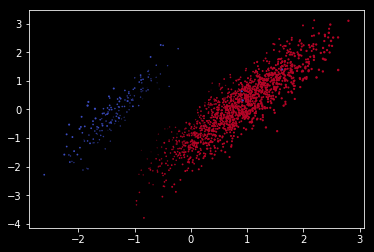

In [11]:
plt.style.use("dark_background")
plt.scatter(x[:,1],x[:,2],x[:,3],c=y[:,0],cmap=plt.cm.coolwarm_r)
plt.show()

In [12]:

def sigmoid(z):
    return 1/(1.0 + np.exp(-z))

def getyPred(theta,x):
    return sigmoid(np.dot(x,theta))

def predict(theta,x):
    y_pred = getyPred(theta,x)
    result = np.zeros((y_pred.shape))
    result[y_pred>0.5]=1
    return result

def error(x,y,theta):
    y_ = getyPred(theta,x)
    
    e=-(np.sum(y*np.log(y_)+(1-y)*np.log(1-y_)))
    m = x.shape[0]
    return e/m

def getGrad(x,y,theta):
    y_ = getyPred(theta,x)
    grad = np.dot(x.T,(y_-y))
    return grad

In [13]:
def gradDescent(x,y,lr,maxItr):
    theta = np.zeros((x.shape[1],1))
    error_list = [ ]
    
    for i in range(maxItr): 
        grad = getGrad(x,y,theta)
        e = error(x,y,theta) 
        theta = theta - lr*grad
        error_list.append(e)
        
    return theta,error_list

In [14]:
theta,error_list=gradDescent(x,y,0.001,300)

In [15]:
theta

array([[-1.25540618],
       [-5.29728247],
       [ 3.2965437 ],
       [-2.92332818]])

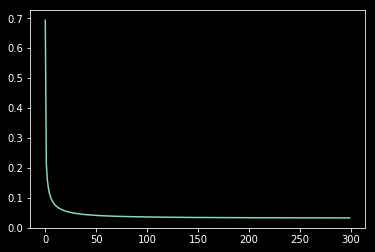

In [16]:
plt.plot(error_list)

/usr/lib/python3/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


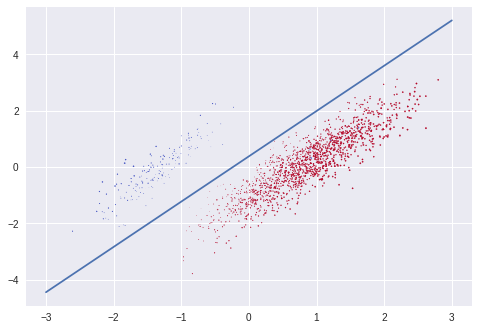

In [17]:
plt.style.use("seaborn")
plt.scatter(x[:,1],x[:,2],x[:,3],c=y[:,0],cmap=plt.cm.coolwarm_r)
x1 = np.linspace(-3,+3,5)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.show()

In [18]:
result=predict(theta,x_)

In [19]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [20]:
result.shape

(1000, 1)

In [21]:
np.savetxt('./file2.csv',result,fmt='%f')

In [22]:
%history -n -o 1-21

   1:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
   2:
x=pd.read_csv('Logistic_X_Train.csv').values
y=pd.read_csv('Logistic_Y_Train.csv').values
x_=pd.read_csv('Logistic_X_Test.csv').values
   3: x_.shape
(1000, 3)
   4: x.shape
(3000, 3)
   5:
u = x.mean(axis=0)
std = x.std(axis=0)

x= (x-u)/std
   6: indices=np.ones((3000,1))
   7: x=np.hstack((indices,x))
   8: ones=np.ones((1000,1))
   9: x_=np.hstack((ones,x_))
  10: x.shape
(3000, 4)
  11:
plt.style.use("dark_background")
plt.scatter(x[:,1],x[:,2],x[:,3],c=y[:,0],cmap=plt.cm.coolwarm_r)
plt.show()
  12:

def sigmoid(z):
    return 1/(1.0 + np.exp(-z))

def getyPred(theta,x):
    return sigmoid(np.dot(x,theta))

def predict(theta,x):
    y_pred = getyPred(theta,x)
    result = np.zeros((y_pred.shape))
    result[y_pred>0.5]=1
    return result

def error(x,y,theta):
    y_ = getyPred(theta,x)
    
    e=-(np.sum(y*np.log(y_)+(1-y)*np.log(1-y_)))
    m = x.shape[0]
    return e/m

def getGrad(x,y,theta):